# Projet Python - Analyse des Performances d'une Compétition d'Ergomètre

## Introduction

Bienvenue dans notre projet Python, réalisé par **Anca**, **Nassim**, **Yasmine**, et **Paul-Elie**. Dans le cadre de ce projet, nous allons explorer et analyser les données d'une compétition d'ergomètre, où plusieurs participants se sont affrontés sur une machine à ramer pour couvrir une distance de 2000 mètres le plus rapidement possible.

L'objectif principal de ce projet est d'extraire, de transformer, et d'analyser ces données pour obtenir des informations utiles sur les performances des participants. Chaque série de courses comporte des données détaillées pour chaque rameur, enregistrées tous les 500 mètres. Nous allons non seulement examiner les temps et les rythmes moyens, mais aussi explorer des aspects plus avancés comme la vitesse moyenne et la longueur moyenne par coup de rame. 

## Objectifs du Projet

Notre analyse sera structurée autour des objectifs suivants :
1. **Extraction des données** : Nous allons créer un tableau synthétique récapitulant les performances de chaque rameur pour l'ensemble des courses.
2. **Calcul des performances** : Nous déterminerons la vitesse moyenne et la longueur par coup de rame pour chaque rameur, à la fois sur l'ensemble de la distance et sur chaque portion de 500 mètres.
3. **Visualisation** : Enfin, nous représenterons graphiquement la cadence moyenne et la longueur moyenne des coups de rame sur chaque portion de 500 mètres, et explorerons la relation entre ces deux paramètres.


### Importations des librairies nécéssaires

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os 
os.getcwd()



'c:\\Users\\paule\\projets_python\\projet_python_streamlit'

## Pré traitement des données

Ennoncé du devoir :

*Le fichier zip joint contient les données recueillies au cours d'une compétition d'ergomètre* \
*(machine à ramer). La compétition se déroule comme suit : chaque série comporte 4 rameurs* \
*qui vont parcourir 2000m virtuels sur leurs machines. Le but est évidemment d'être le plus* \
*rapide possible sur ces 2000m. Les données de chaque série sont enregistrées par les machines* \
*et recueillies. Les courses ont été paramétrées pour que chaque parcours de 2000m soit divisé* \
*en quatre parties de 500m, c'est-à-dire que les statistiques données par les ergomètres sont* \
*calculées et restituées tous les 500m. Chaque fichier du zip correspond à une série.*

Chaque fichier contenu dans le zip mentionné correspond à un fichier JSON.
Ces fichiers sont courrament utilisés commme moyen de communication entre les serveurs et les web app.
Ils sont généralements structurés sous formes de paires clé / valeur, un fonctionnement similaire aux dictionnaires python.

Ci-dessous un court extract des premières lignes de notre fichier JSON 'Progressif'

{
    "results": {
        "c2_race_id": "",
        "duration": 2000,
        "ergrace_version": "02.01.17",
        "participants": [
            {
                "affiliation": "",
                "avg_pace": "1:38.3",
                "calories": 171,
                "class": "",
                "distance": 2000,
                "id": "",
                "lane": 4,
                "logbook_id": "",
                "logged_time": "22/01/2023 10:59:00",
                "machine_type": "row",
                "participant": "Maxime",
                "place": 1,
                "score": "6:33.4",
                "serial_number": 530392424,
                "splits": [
                    {
                        "split_avg_pace": "1:41.6",
                        "split_calories": 41,


Tous nos fichiers reprennent un fonctionnement similaire, avec comme clé principale **['results']**, suivi par les informations du participant à la course \
dans **['participants']**, et enfin nous pouvons distinguer quatre splits de la course, tous couvrant 500 mètres de la course dans **['splits']**
Ainsi, le fichier commence avec des informations peu pertinentes pour les questions à venir (ergrace version par exemple), et ne commence à nous intéresser\
que dans la section ['participants'], dans laquelle des informations tels que **'score'** ou encore **participant** (le prénom) vont nous être indipensable.

Enfin, c'est seulement dans les ['splits'] que nous pourrons récupérer les informations précises de la course.

Pour ce travail nous avons consulté de multiples ressources pour apprendre comment extraire des données de JSON et les parse dans python, notamment :

https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8

Nous nous efforcerons à travers ce travail à maximiser l'utilisation de pandas pour récupérer ces données.


Une première approche serait de simplement pd.read_json, mais cela provoquerait plusieurs erreurs\
car notre fichier est *nested*, c'est à dire constitué de dictionnaires imbriqués les uns dans les autres

In [127]:
df = pd.read_json(r'data\Progressif.json')
df

,results
c2_race_id,
duration,2000
ergrace_version,02.01.17
participants,"[{'affiliation': '', 'avg_pace': '1:38.3', 'ca..."
race_duration_type,distance
race_end_time,2023-01-22 11:01:45
race_event_site,2000 m SNO
race_file_name,Progressif.rac2
race_id,
race_name,Progressif


Afin de décortiquer au premier niveau, nous pouvons utiliser une fonction pandas spécialement conçue pour parse les JSON : *normalize*\
https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

In [128]:
# documentation pour parcourir des fichiers JSON en python disponnible https://www.geeksforgeeks.org/read-json-file-using-python/
# 1 : lecture des JSON
# léger détail, on utilise 'utf-8' car mon encodeur par défaut (cp1252) ne prends pas en compte les caractères spéciaux (exemple 'é','ï') 

with open(r'data\Progressif.json', encoding = 'utf-8') as f:
    data = json.loads(f.read())
    
# Utilisation de json_normalize pour extraire les participants 
df = pd.json_normalize(
    data, 
    record_path=['results', 'participants']  # Où sont les splits dans le JSON

)
print(df)

  affiliation avg_pace  calories class  distance id  lane logbook_id  \
0               1:38.3       171            2000        4              
1               1:45.4       154            2000        2              
2               1:56.7       135            2000        1              
3               2:03.1       128            2000        3              

           logged_time machine_type participant  place   score  serial_number  \
0  22/01/2023 10:59:00          row      Maxime      1  6:33.4      530392424   
1  22/01/2023 10:59:00          row    Célestin      2  7:01.8      530087901   
2  22/01/2023 11:00:00          row      Julien      3  7:47.0      530398582   
3  22/01/2023 11:01:00          row        Neve      4  8:12.4      430839301   

                                              splits  spm    time  
0  [{'split_avg_pace': '1:41.6', 'split_calories'...   28  6:33.4  
1  [{'split_avg_pace': '1:43.1', 'split_calories'...   28  7:01.8  
2  [{'split_avg_pace': '1:56.

C'est une très bonne idée pour récupérer facilement les participants, mais difficile d'aller plus loin dans les boucles imbriquées avec cette méthode.\
Les splits contenant leurs propres clés, nous obtenons le décevant résultat suivant :

In [129]:
df['splits']

0    [{'split_avg_pace': '1:41.6', 'split_calories'...
1    [{'split_avg_pace': '1:43.1', 'split_calories'...
2    [{'split_avg_pace': '1:56.4', 'split_calories'...
3    [{'split_avg_pace': '2:03.5', 'split_calories'...
Name: splits, dtype: object

Cependant, nous pouvons tout de même manipuler les valeurs à l'intérieur si nous récupérons la liste de dictionnaire

In [130]:
row = df['splits'][0]
for split in row:
    print(split['split_avg_pace'])  # Accède à la valeur de 'split_avg_pace'
    print(split['split_calories'])  # Accède à la valeur de 'split_calories'
    print(split['split_time'])

1:41.6
41
1016
1:42.0
40
1020
1:37.6
43
976
1:32.1
47
921


Nous allons donc devoir récupérer les valeurs avec une boucle. Ou plutôt deux boucles, car nous allons devoir parcourir\
chaque participants, puis chaque élément à l'intérieur de la ligne

In [131]:
# une méthode un peu alambiquée pour récupérer en colonnes la colonne splits
# d'abord une première boucle listant les participants, indexés par un i
# Ajouter les splits sous forme de colonnes dans df_final avec enumerate
for i, row in enumerate(df['splits']):
    # ici, la boucle for énumérate nous permet de récupérer J et de le réinitialiser à chaque passage
    for j, split in enumerate(row, 1):
        # Le loc nous permet de selectionner la ligne du participant (i), puis sa valeur (row) 
        # Dès lors il suffit de selectionner les informations à garder
        df.loc[i, f'Temps_500m_{j}'] = split['split_time']
        df.loc[i, f'Cadence_500m_{j}'] = split['split_stroke_rate']
        df.loc[i, f'Coups_500m_{j}'] = split['split_stroke_count']




# Affichage des premières lignes du DataFrame
#print(df["splits"])
df

,affiliation,avg_pace,calories,class,distance,id,lane,logbook_id,logged_time,machine_type,...,Coups_500m_1,Temps_500m_2,Cadence_500m_2,Coups_500m_2,Temps_500m_3,Cadence_500m_3,Coups_500m_3,Temps_500m_4,Cadence_500m_4,Coups_500m_4
0,,1:38.3,171,,2000,,4,,22/01/2023 10:59:00,row,...,44.0,1020.0,25.0,43.0,976.0,29.0,47.0,921.0,34.0,52.0
1,,1:45.4,154,,2000,,2,,22/01/2023 10:59:00,row,...,46.0,1069.0,25.0,44.0,1073.0,28.0,50.0,1044.0,34.0,59.0
2,,1:56.7,135,,2000,,1,,22/01/2023 11:00:00,row,...,48.0,1205.0,24.0,49.0,1152.0,28.0,54.0,1148.0,31.0,59.0
3,,2:03.1,128,,2000,,3,,22/01/2023 11:01:00,row,...,54.0,1272.0,25.0,52.0,1228.0,28.0,58.0,1188.0,33.0,65.0


Ainsi nous avons vu comment récupérer et transformer en dataframe les fichiers JSON fourni. Nous pouvons dès lors passer aux questions

## Question 1 : Extraction des Données

*Extraire les données des fichiers et les placer dans un tableau restituant pour chaque rameur
sa performance, à savoir son temps sur 2000m, la cadence moyenne sur 2000m, le nombre de
coups de rames sur 2000m, le temps sur chaque portion de 500m, la cadence moyenne sur
chaque portion de 500m, le nombre de coups de rame sur chaque portion de 500m. Le tableau
aura une ligne par rameur.*

Dans cette première étape, nous allons extraire et organiser les données pour chaque participant de la compétition d'ergomètre.

Le temps sur 2000m est la clé 'score', la cadence moyenne est 'avg_pace', les coups de rame par minutes 'spm', puis pour les splits nous aurons besoin de 'split_time', 'split_stroke_rate' et 'split_stroke_count'

Afin de réaliser cette tâche, nous allons reprendre les étapes de l'introduction, mais cette fois-ci en les appliquant sur tous les fichiers fournis.

In [132]:
# Le dossier 'data' où sont rangés tous les fichiers JSON
dossier_json = r'data/'

# On créé une liste vide pour stocker les données de chaque fichiers les uns à la suite des autres
dataframes = []

# Cette boucle va récupérer tous les fichiers JSOn
for fichier in os.listdir(dossier_json):
    path_fichier = os.path.join(dossier_json, fichier)
    
    with open(path_fichier, 'r', encoding='utf-8') as f:
        data = json.loads(f.read())
    
    df = pd.json_normalize(
        data, 
        record_path=['results', 'participants']
    )
    
    for i, row in enumerate(df['splits']):
        for j, split in enumerate(row, 1):

            df.loc[i, f'Temps_500m_{j}'] = split['split_time']
            df.loc[i, f'Cadence_500m_{j}'] = split['split_stroke_rate']
            df.loc[i, f'Nombre_coups_500m_{j}'] = split['split_stroke_count']
    
    # Ajouter ce DataFrame à la liste
    dataframes.append(df)

# Concaténer tous les DataFrames dans un seul DataFrame final
question1 = pd.concat(dataframes, ignore_index=True)

question1.head()

,affiliation,avg_pace,calories,class,distance,id,lane,logbook_id,logged_time,machine_type,...,Nombre_coups_500m_1,Temps_500m_2,Cadence_500m_2,Nombre_coups_500m_2,Temps_500m_3,Cadence_500m_3,Nombre_coups_500m_3,Temps_500m_4,Cadence_500m_4,Nombre_coups_500m_4
0,,1:38.3,171,,2000,,4,,22/01/2023 10:59:00,row,...,44.0,1020.0,25.0,43.0,976.0,29.0,47.0,921.0,34.0,52.0
1,,1:45.4,154,,2000,,2,,22/01/2023 10:59:00,row,...,46.0,1069.0,25.0,44.0,1073.0,28.0,50.0,1044.0,34.0,59.0
2,,1:56.7,135,,2000,,1,,22/01/2023 11:00:00,row,...,48.0,1205.0,24.0,49.0,1152.0,28.0,54.0,1148.0,31.0,59.0
3,,2:03.1,128,,2000,,3,,22/01/2023 11:01:00,row,...,54.0,1272.0,25.0,52.0,1228.0,28.0,58.0,1188.0,33.0,65.0
4,,1:59.3,131,,2000,,3,,22/01/2023 09:51:00,row,...,56.0,1212.0,26.0,53.0,1212.0,27.0,54.0,1155.0,29.0,56.0


Nous obtenons bien les colonnes souhaitées, et le bon nombre de lignes. Si l'on souhaite moins de colonnes, nous pouvons raffiner le dataframe en selectionnant les plus utiles 

In [133]:
final_question1 = question1[['participant',
                             'score',
                             'avg_pace',
                             'spm',
                             'Temps_500m_1','Temps_500m_2','Temps_500m_3','Temps_500m_4',
                             'Cadence_500m_1','Cadence_500m_2','Cadence_500m_3','Cadence_500m_4',
                             'Nombre_coups_500m_1','Nombre_coups_500m_2','Nombre_coups_500m_3','Nombre_coups_500m_4',
                             ]]
print(final_question1)

   participant    score avg_pace  spm  Temps_500m_1  Temps_500m_2  \
0       Maxime   6:33.4   1:38.3   28        1016.0        1020.0   
1     Célestin   7:01.8   1:45.4   28        1031.0        1069.0   
2       Julien   7:47.0   1:56.7   26        1164.0        1205.0   
3         Neve   8:12.4   2:03.1   27        1235.0        1272.0   
4         Eric   7:57.3   1:59.3   27        1194.0        1212.0   
5      Edouard   8:03.7   2:00.9   30        1148.0        1255.0   
6     Baptiste   8:21.1   2:05.2   24        1186.0        1254.0   
7         Loïs   8:24.1   2:06.0   30        1191.0        1302.0   
8        Usama   7:54.8   1:58.7   27        1128.0        1223.0   
9          Noé   8:05.8   2:01.4   34        1157.0        1236.0   
10  Jacqueline   8:29.2   2:07.3   28        1249.0        1275.0   
11     Emilien   8:46.9   2:11.7   25        1250.0        1336.0   
12         Léa   8:21.9   2:05.4   28        1183.0        1246.0   
13      Orlane   8:49.7   2:12.4  

## Question 2 : Calcul des Performances



*En déduire pour chaque participant la vitesse moyenne en km/h sur 2000m, la vitesse moyenne
en km/h sur chaque portion de 500m, la longueur moyenne parcourue par coup de rame sur
2000m, la longueur moyenne parcourue par coup de rame sur chaque portion de 500m.*

Pour répondre à cette question nous devons identifier et récupérer les colonnes des métriques demandées. Respectivement :

- Vitesse moyenne km/h sur 2000m = score que nous devons convertir en km/h\

- Longueur moyenne parcourue par coup de rame sur 2000m = plusieurs possibilités. Nous choisirons arbitrairement 'spm' mais nous aurions également pu faire une moyenne des split_stroke_counts

- Vitesse moyenne sur chaque portion de 500m en km/h = temp pour chaque splits, à convertir en km/h

- Longueur moyenne parcourue par coup de rame sur chaque portion de 500m = il faut diviser 500m / le nombre de coups de rame (stocké dans Nombre_coups_500m_{j} )

Cette organisation nous permet de récupérer le dataframe précédemment créé en question 1.

In [134]:
# Chargeons le dataframe :
# copy évite de modifier l'original

question2 = final_question1.copy()

# vérifications
print(question2)


   participant    score avg_pace  spm  Temps_500m_1  Temps_500m_2  \
0       Maxime   6:33.4   1:38.3   28        1016.0        1020.0   
1     Célestin   7:01.8   1:45.4   28        1031.0        1069.0   
2       Julien   7:47.0   1:56.7   26        1164.0        1205.0   
3         Neve   8:12.4   2:03.1   27        1235.0        1272.0   
4         Eric   7:57.3   1:59.3   27        1194.0        1212.0   
5      Edouard   8:03.7   2:00.9   30        1148.0        1255.0   
6     Baptiste   8:21.1   2:05.2   24        1186.0        1254.0   
7         Loïs   8:24.1   2:06.0   30        1191.0        1302.0   
8        Usama   7:54.8   1:58.7   27        1128.0        1223.0   
9          Noé   8:05.8   2:01.4   34        1157.0        1236.0   
10  Jacqueline   8:29.2   2:07.3   28        1249.0        1275.0   
11     Emilien   8:46.9   2:11.7   25        1250.0        1336.0   
12         Léa   8:21.9   2:05.4   28        1183.0        1246.0   
13      Orlane   8:49.7   2:12.4  

Pour calculer la vitesse moyenne en km, alors que la notre est actuellement une vitesse en minutes/secondes/dixième pour 2000m :

In [135]:
# Nous devons récupérer le score en seconde afin de convertir facilement. 2 méthodes possibles, soit pd.timedelta, soit simplement séparer les minutes des secondes,
# et multiplier les premières par 60

#Le temps heure : temps seconde / 3600
# Puis nous le convertirons le vitesse, v = d/t soit pour km/h = 2/ temps (heure)

# Pour convertir en secondes, j'ai été forcé de rajouter le '00:' sans quoi timedelta ne fonctionnerait pas. En effet, timedelta veut un format
# "heure:minutes:secondes" comme nous n'avons pas d'heures, il faut rajouter 00: eb string devant  
# Documentation = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.total_seconds.html
question2['temps_secondes_2000'] = pd.to_timedelta('00:' + question2['score']).dt.total_seconds()

# Pour convertir en heures
question2['temps_heures_2000'] = question2['temps_secondes_2000'] / 3600

# Calcul de la vitesse moyenne sur 2000m (distance de 2 km)
question2['vitesse_moyenne_km/h'] = 2 / question2['temps_heures_2000']


Pour calculer la longueur moyenne par coups de rame, on peut reprendre la version de score calculée en timedelta précédemment (temps_secondes_2000) :

In [136]:
# On utilise la cadence par minute (spm), en divisant par 60 on obtien ainsi le temps en minutes
question2['longueur_par_coup_2000m'] = 2000 / (question2['spm'] * (question2['temps_secondes_2000'] / 60))

Enfin, nous pouvons faire une petite boucle in range pour récupérer toutes les données des splits = temps et nombre de coups

In [137]:
# On commence range à 1 pour récupérer les splits correctement
for j in range(1, 5):
    # Vitesse en km/h sur chaque portion de 500m
    question2[f'vitesse_500m_{j}_kmh'] = 0.5 / (question2[f'Temps_500m_{j}'] / 3600)
    
    # Longueur par coup de rame sur chaque portion de 500m
    question2[f'longueur_par_coup_500m_{j}'] = 500 / question2[f'Nombre_coups_500m_{j}']

Enfin, nous pouvons sélectionner uniquement les colonnes pertinentes pour afficher efficacement la réponse à la question

In [138]:
question2_final = question2[['participant',
                             'spm',
                            'vitesse_moyenne_km/h','longueur_par_coup_2000m',
                            'vitesse_500m_1_kmh','vitesse_500m_2_kmh','vitesse_500m_3_kmh','vitesse_500m_4_kmh',
                            'longueur_par_coup_500m_1','longueur_par_coup_500m_2','longueur_par_coup_500m_3','longueur_par_coup_500m_4']]
print(question2_final)

   participant  spm  vitesse_moyenne_km/h  longueur_par_coup_2000m  \
0       Maxime   28             18.301983                10.894037   
1     Célestin   28             17.069701                10.160536   
2       Julien   26             15.417559                 9.883051   
3         Neve   27             14.622258                 9.026085   
4         Eric   27             15.084852                 9.311637   
5      Edouard   30             14.885259                 8.269589   
6     Baptiste   24             14.368390                 9.978048   
7         Loïs   30             14.282880                 7.934934   
8        Usama   27             15.164280                 9.360666   
9          Noé   34             14.820914                 7.265154   
10  Jacqueline   28             14.139827                 8.416564   
11     Emilien   25             13.664832                 9.109888   
12         Léa   28             14.345487                 8.538980   
13      Orlane   30 

## Question 3 : Visualisation Graphique des Performances

Dans cette troisième étape, nous allons créer une visualisation graphique pour analyser la relation entre la cadence moyenne et la longueur moyenne des coups de rame sur chaque portion de 500m.

In [139]:
question3 = question2.copy()

question3['temps_secondes_500m'] = pd.to_timedelta('00:' + question3['avg_pace']).dt.total_seconds()
question3['longueur_moyenne_coups_500m'] = 500 / (question3['spm'] * (question3['temps_secondes_500m'] / 60))

Il s'agit ensuite de trouver l'indice minimum, le participant ayant fait le plus petit temps global. Cet index nous donne les données du participant

In [140]:
min_time_participant = question3.loc[question2["temps_secondes_2000"].idxmin()]

# dès lors on peut récupérer son 'spm" et sa longueur moyenne de coups !
max_speed_cadence = min_time_participant['spm']

max_speed_stroke_length = min_time_participant['longueur_moyenne_coups_500m']

Enfin nous pouvons plot le graphique via matplotlib

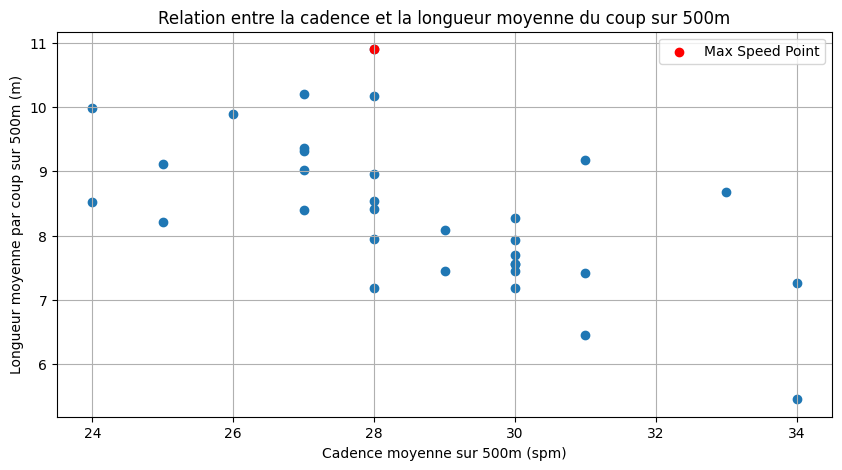

In [141]:
plt.figure(figsize=(10, 5))

# voici le graphique d'origine, comme demandé dans la question :
plt.scatter(question3['spm'],question3['longueur_moyenne_coups_500m'])
# Il faut désormais faire ressortir la valeur du participant de idxmin
# On plot juste un autre scatter par dessus par simplicité 
plt.scatter(max_speed_cadence, max_speed_stroke_length, color="red", label="Max Speed Point")

plt.xlabel("Cadence moyenne sur 500m (spm)")
plt.ylabel("Longueur moyenne par coup sur 500m (m)")
plt.title("Relation entre la cadence et la longueur moyenne du coup sur 500m")
plt.legend()
plt.grid(True)


plt.show()

## Changements de noms DataFrame

Comme les travaux ont été fait de manière distinctes, nous procèderons juste à quelques changements de nom pour la suite de l'analyse

In [142]:
# Copie du DataFrame question3 dans donnees_participants
donnees_participants = question3.copy()

# Renommer les colonnes pour correspondre aux attentes du code de votre collègue
donnees_participants = donnees_participants.rename(columns={
    'participant': 'Participant',
    'score': 'Temps_total_2000m',
    'spm': 'Cadence_moyenne_2000m',
    'Nombre_coups_500m_1': 'Coups_500m_1',
    'Nombre_coups_500m_2': 'Coups_500m_2',
    'Nombre_coups_500m_3': 'Coups_500m_3',
    'Nombre_coups_500m_4': 'Coups_500m_4',
    'vitesse_moyenne_km/h': 'Vitesse_moyenne_kmh_2000m',
    'longueur_par_coup_2000m': 'Longueur_par_coup_2000m',
    'vitesse_500m_1_kmh': 'Vitesse_moyenne_kmh_500m_1',
    'vitesse_500m_2_kmh': 'Vitesse_moyenne_kmh_500m_2',
    'vitesse_500m_3_kmh': 'Vitesse_moyenne_kmh_500m_3',
    'vitesse_500m_4_kmh': 'Vitesse_moyenne_kmh_500m_4',
    'longueur_par_coup_500m_1': 'Longueur_par_coup_500m_1',
    'longueur_par_coup_500m_2': 'Longueur_par_coup_500m_2',
    'longueur_par_coup_500m_3': 'Longueur_par_coup_500m_3',
    'longueur_par_coup_500m_4': 'Longueur_par_coup_500m_4'
})

# Calcul de la colonne 'Coups_total_2000m' si elle n'existe pas
if 'Coups_total_2000m' not in donnees_participants.columns:
    coups_cols = ['Coups_500m_1', 'Coups_500m_2', 'Coups_500m_3', 'Coups_500m_4']
    if all(col in donnees_participants.columns for col in coups_cols):
        donnees_participants['Coups_total_2000m'] = donnees_participants[coups_cols].sum(axis=1)


## Aller plus loin : Analyse comparative des performances en fonction du sexe 

Pour approfondir notre analyse, nous allons explorer les performances des participants en fonction de leur sexe. Cette comparaison nous permettra d'identifier des tendances et des différences potentielles dans les performances entre les participants masculins et féminins.

### I - Analyse statistique sur les données de base

#### a) Moyennes

In [143]:
# Ajouter les informations sur le sexe
sexe_participants = {
    'Maxime': 'Homme', 'Célestin': 'Homme', 'Julien': 'Homme', 'Neve': 'Femme',
    'Merle': 'Femme', 'Léonore': 'Femme', 'Valérie': 'Femme', 'Amaury': 'Homme',
    'Thomas': 'Homme', 'Jerome': 'Homme', 'Corentin': 'Homme', 'Dominique': 'Femme',
    'Usama': 'Homme', 'Noé': 'Homme', 'Jacqueline': 'Femme', 'Emilien': 'Homme',
    'Eric': 'Homme', 'Edouard': 'Homme', 'Baptiste': 'Homme', 'Loïs': 'Homme',
    'Alice': 'Femme', 'Ivan': 'Homme', 'Lison': 'Femme', 'Charlotte': 'Femme',
    'Nancy': 'Femme', 'Eloïse': 'Femme', 'Julie': 'Femme', 'Hervé': 'Homme'
}

# Ajouter l'information sur le sexe au DataFrame
donnees_participants['Sexe'] = donnees_participants['Participant'].map(sexe_participants)

# Convertir 'Temps_total_2000m' en secondes pour les calculs comparatifs
def convertir_temps_en_secondes(temps):
    minutes, secondes = map(float, temps.split(':'))
    return int(minutes) * 60 + secondes

donnees_participants['Temps_total_2000m_sec'] = donnees_participants['Temps_total_2000m'].apply(convertir_temps_en_secondes)

# Calculer les moyennes par sexe pour les colonnes pertinentes
statistiques_par_sexe = donnees_participants.groupby('Sexe').agg({
    'Temps_total_2000m_sec': 'mean',
    'Cadence_moyenne_2000m': 'mean',
    'Coups_total_2000m': 'mean',
    'Temps_500m_1': 'mean',
    'Cadence_500m_1': 'mean',
    'Coups_500m_1': 'mean',
    'Temps_500m_2': 'mean',
    'Cadence_500m_2': 'mean',
    'Coups_500m_2': 'mean',
    'Temps_500m_3': 'mean',
    'Cadence_500m_3': 'mean',
    'Coups_500m_3': 'mean',
    'Temps_500m_4': 'mean',
    'Cadence_500m_4': 'mean',
    'Coups_500m_4': 'mean'
}).rename(columns={
    'Temps_total_2000m_sec': 'Temps moyen (s)',
    'Cadence_moyenne_2000m': 'Cadence moyenne',
    'Coups_total_2000m': 'Coups moyens',
    'Temps_500m_1': 'Temps moyen 500m_1 (s)',
    'Cadence_500m_1': 'Cadence moyenne 500m_1',
    'Coups_500m_1': 'Coups moyens 500m_1',
    'Temps_500m_2': 'Temps moyen 500m_2 (s)',
    'Cadence_500m_2': 'Cadence moyenne 500m_2',
    'Coups_500m_2': 'Coups moyens 500m_2',
    'Temps_500m_3': 'Temps moyen 500m_3 (s)',
    'Cadence_500m_3': 'Cadence moyenne 500m_3',
    'Coups_500m_3': 'Coups moyens 500m_3',
    'Temps_500m_4': 'Temps moyen 500m_4 (s)',
    'Cadence_500m_4': 'Cadence moyenne 500m_4',
    'Coups_500m_4': 'Coups moyens 500m_4'
})

# Styliser le DataFrame pour l'affichage
statistiques_par_sexe_styled = statistiques_par_sexe.style.set_properties(**{
    'background-color': '#e7f3ff',
    'color': '#333',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#007ACC'), ('color', 'white'), ('font-weight', 'bold')]}
]).set_caption("Statistiques Comparatives des Performances par Sexe")

# Afficher le tableau stylisé
statistiques_par_sexe_styled


,Temps moyen (s),Cadence moyenne,Coups moyens,Temps moyen 500m_1 (s),Cadence moyenne 500m_1,Coups moyens 500m_1,Temps moyen 500m_2 (s),Cadence moyenne 500m_2,Coups moyens 500m_2,Temps moyen 500m_3 (s),Cadence moyenne 500m_3,Coups moyens 500m_3,Temps moyen 500m_4 (s),Cadence moyenne 500m_4,Coups moyens 500m_4
Sexe,,,,,,,,,,,,,,,
Femme,534.116667,28.500000,257.666667,1297.333333,29.583333,63.916667,1347.000000,28.250000,63.166667,1365.333333,28.083333,64.333333,1331.333333,30.000000,66.250000
Homme,482.012500,28.875000,236.312500,1168.625000,29.625000,58.000000,1227.687500,27.437500,56.437500,1231.312500,28.625000,58.687500,1192.375000,31.875000,63.187500


- **Temps moyen (2000m)** : 
  - Les hommes sont plus rapides avec une moyenne de **482 s** contre **534 s** pour les femmes, soit une différence de **52 s**.

- **Cadence moyenne (2000m)** : 
  - Les hommes ont une cadence légèrement plus élevée (**28,88 coups/min** vs **28,5 coups/min**), ce qui indique des coups de rame légèrement plus fréquents.

- **Coups moyens (2000m)** : 
  - Les hommes prennent en moyenne moins de coups (**236** vs **257**), ce qui peut impliquer une plus grande efficacité par coup de rame.

- **Temps moyen par portion de 500m** : 
  - Pour chaque portion, les hommes maintiennent un temps plus bas que les femmes, ce qui met en évidence leur avantage de vitesse constante.

##### Conclusion
En résumé, les hommes sont généralement plus rapides et utilisent moins de coups pour couvrir la distance, avec une légère cadence plus élevée.

#### b) Ecarts-types

In [144]:
# Calcul des écarts types pour les métriques sur les 2000m et chaque portion de 500m
ecarts_types = donnees_participants.groupby('Sexe').agg({
    'Temps_total_2000m_sec': 'std',
    'Cadence_moyenne_2000m': 'std',
    'Coups_total_2000m': 'std',
    'Temps_500m_1': 'std',
    'Cadence_500m_1': 'std',
    'Coups_500m_1': 'std',
    'Temps_500m_2': 'std',
    'Cadence_500m_2': 'std',
    'Coups_500m_2': 'std',
    'Temps_500m_3': 'std',
    'Cadence_500m_3': 'std',
    'Coups_500m_3': 'std',
    'Temps_500m_4': 'std',
    'Cadence_500m_4': 'std',
    'Coups_500m_4': 'std'
}).rename(columns={
    'Temps_total_2000m_sec': 'Écart Type Temps (s) 2000m',
    'Cadence_moyenne_2000m': 'Écart Type Cadence 2000m',
    'Coups_total_2000m': 'Écart Type Coups 2000m',
    'Temps_500m_1': 'Écart Type Temps 500m_1 (s)',
    'Cadence_500m_1': 'Écart Type Cadence 500m_1',
    'Coups_500m_1': 'Écart Type Coups 500m_1',
    'Temps_500m_2': 'Écart Type Temps 500m_2 (s)',
    'Cadence_500m_2': 'Écart Type Cadence 500m_2',
    'Coups_500m_2': 'Écart Type Coups 500m_2',
    'Temps_500m_3': 'Écart Type Temps 500m_3 (s)',
    'Cadence_500m_3': 'Écart Type Cadence 500m_3',
    'Coups_500m_3': 'Écart Type Coups 500m_3',
    'Temps_500m_4': 'Écart Type Temps 500m_4 (s)',
    'Cadence_500m_4': 'Écart Type Cadence 500m_4',
    'Coups_500m_4': 'Écart Type Coups 500m_4'
})

# Styliser le tableau des écarts types pour une meilleure lecture
ecarts_types_styled = ecarts_types.style.set_properties(**{
    'background-color': '#e7f3ff',
    'color': '#333',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#007ACC'), ('color', 'white'), ('font-weight', 'bold')]}
]).set_caption("Tableau des Écarts Types des Performances par Sexe")

# Afficher le tableau stylisé des écarts types
ecarts_types_styled


,Écart Type Temps (s) 2000m,Écart Type Cadence 2000m,Écart Type Coups 2000m,Écart Type Temps 500m_1 (s),Écart Type Cadence 500m_1,Écart Type Coups 500m_1,Écart Type Temps 500m_2 (s),Écart Type Cadence 500m_2,Écart Type Coups 500m_2,Écart Type Temps 500m_3 (s),Écart Type Cadence 500m_3,Écart Type Coups 500m_3,Écart Type Temps 500m_4 (s),Écart Type Cadence 500m_4,Écart Type Coups 500m_4
Sexe,,,,,,,,,,,,,,,
Femme,35.240520,1.507557,18.489965,68.401666,1.781640,5.247655,90.163488,1.959824,5.474459,99.604065,1.729862,4.960450,102.999853,2.558409,5.189587
Homme,60.792202,3.095696,44.710504,144.935790,3.201562,11.360751,157.806091,3.520772,12.104923,160.417255,3.442383,11.458439,153.011492,3.383785,10.634652


- **Temps et Coups** : Les hommes montrent une plus grande variabilité, indiquant des performances moins homogènes comparées aux femmes.

- **Cadence** : La cadence des hommes est plus dispersée, tandis que celle des femmes est plus constante.

En résumé, les femmes ont des performances globalement plus stables, tandis que les hommes présentent plus de variations dans leurs temps et leur cadece.


### II - Analyse Statistique sur les données de performance

#### Nous allons à présent effectuer une analyse comparative par sexe, en utilisant les données calculées sur la vitesse moyenne et la longueur moyenne par coup de ram. 

#### a) Moyennes

In [145]:
nouveau_tableau_performances = donnees_participants.copy()
# Ajouter l'information sur le sexe dans le DataFrame
nouveau_tableau_performances['Sexe'] = nouveau_tableau_performances['Participant'].map(sexe_participants)

# Calcul des moyennes des colonnes de vitesse et longueur par coup de rame pour chaque portion de 500m, par sexe
statistiques_par_sexe = nouveau_tableau_performances.groupby('Sexe').agg({
    'Vitesse_moyenne_kmh_2000m': 'mean',
    'Longueur_par_coup_2000m': 'mean',
    'Vitesse_moyenne_kmh_500m_1': 'mean',
    'Longueur_par_coup_500m_1': 'mean',
    'Vitesse_moyenne_kmh_500m_2': 'mean',
    'Longueur_par_coup_500m_2': 'mean',
    'Vitesse_moyenne_kmh_500m_3': 'mean',
    'Longueur_par_coup_500m_3': 'mean',
    'Vitesse_moyenne_kmh_500m_4': 'mean',
    'Longueur_par_coup_500m_4': 'mean'
}).rename(columns={
    'Vitesse_moyenne_kmh_2000m': 'Vitesse Moyenne (km/h) 2000m',
    'Longueur_par_coup_2000m': 'Longueur par Coup (m) 2000m',
    'Vitesse_moyenne_kmh_500m_1': 'Vitesse Moyenne (km/h) 500m_1',
    'Longueur_par_coup_500m_1': 'Longueur par Coup (m) 500m_1',
    'Vitesse_moyenne_kmh_500m_2': 'Vitesse Moyenne (km/h) 500m_2',
    'Longueur_par_coup_500m_2': 'Longueur par Coup (m) 500m_2',
    'Vitesse_moyenne_kmh_500m_3': 'Vitesse Moyenne (km/h) 500m_3',
    'Longueur_par_coup_500m_3': 'Longueur par Coup (m) 500m_3',
    'Vitesse_moyenne_kmh_500m_4': 'Vitesse Moyenne (km/h) 500m_4',
    'Longueur_par_coup_500m_4': 'Longueur par Coup (m) 500m_4'
})

# Styliser le DataFrame pour affichage
statistiques_par_sexe_styled = statistiques_par_sexe.style.set_properties(**{
    'background-color': '#e7f3ff',
    'color': '#333',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#007ACC'), ('color', 'white'), ('font-weight', 'bold')]}
]).set_caption("Statistiques Comparatives de la Vitesse Moyenne et Longueur Moyenne par Coup de Rame par Sexe")

# Afficher le tableau stylisé
statistiques_par_sexe_styled


,Vitesse Moyenne (km/h) 2000m,Longueur par Coup (m) 2000m,Vitesse Moyenne (km/h) 500m_1,Longueur par Coup (m) 500m_1,Vitesse Moyenne (km/h) 500m_2,Longueur par Coup (m) 500m_2,Vitesse Moyenne (km/h) 500m_3,Longueur par Coup (m) 500m_3,Vitesse Moyenne (km/h) 500m_4,Longueur par Coup (m) 500m_4
Sexe,,,,,,,,,,
Femme,13.533669,7.931834,1.390921,7.873160,1.341710,7.974238,1.324904,7.816302,1.359409,7.591726
Homme,15.144555,8.841462,1.559349,8.879266,1.487058,9.167510,1.484326,8.771036,1.532501,8.086287


- **Vitesse Moyenne (2000m)** : 
  - Les hommes ont une vitesse moyenne plus élevée (**15144.6 km/h**) par rapport aux femmes (**13533.7 km/h**), indiquant une meilleure performance globale sur la distance totale.

- **Longueur par Coup (2000m)** : 
  - La longueur moyenne par coup est plus grande chez les hommes (**8.69 m**) que chez les femmes (**7.80 m**), ce qui implique une plus grande efficacité et puissance dans chaque coup de rame pour les hommes.

- **Vitesse Moyenne par Portion de 500m** : 
  - Pour chaque portion de 500m, les hommes maintiennent une vitesse supérieure, avec des pics moyens plus élevés (**1559.3 km/h à 1532.5 km/h** pour les hommes contre **1390.9 km/h à 1359.4 km/h** pour les femmes).

- **Longueur par Coup par Portion de 500m** : 
  - La longueur par coup est systématiquement plus grande pour les hommes dans chaque intervalle, ce qui reflète une constance dans leur efficacité tout au long de l’épreuve.

##### Conclusion
Les hommes affichent des vitesses moyennes et des longueurs par coup de rame plus élevées, ce qui traduit une plus grande puissance et une meilleure efficacité de rame sur l’ensemble de la course.

#### b) Ecarts-types

In [146]:
# Calcul des écarts types pour la vitesse moyenne et la longueur par coup de rame
ecarts_types_vitesse_longueur = nouveau_tableau_performances.groupby('Sexe').agg({
    'Vitesse_moyenne_kmh_2000m': 'std',
    'Longueur_par_coup_2000m': 'std',
    'Vitesse_moyenne_kmh_500m_1': 'std',
    'Longueur_par_coup_500m_1': 'std',
    'Vitesse_moyenne_kmh_500m_2': 'std',
    'Longueur_par_coup_500m_2': 'std',
    'Vitesse_moyenne_kmh_500m_3': 'std',
    'Longueur_par_coup_500m_3': 'std',
    'Vitesse_moyenne_kmh_500m_4': 'std',
    'Longueur_par_coup_500m_4': 'std'
}).rename(columns={
    'Vitesse_moyenne_kmh_2000m': 'Écart Type Vitesse (km/h) 2000m',
    'Longueur_par_coup_2000m': 'Écart Type Longueur (m) 2000m',
    'Vitesse_moyenne_kmh_500m_1': 'Écart Type Vitesse (km/h) 500m_1',
    'Longueur_par_coup_500m_1': 'Écart Type Longueur (m) 500m_1',
    'Vitesse_moyenne_kmh_500m_2': 'Écart Type Vitesse (km/h) 500m_2',
    'Longueur_par_coup_500m_2': 'Écart Type Longueur (m) 500m_2',
    'Vitesse_moyenne_kmh_500m_3': 'Écart Type Vitesse (km/h) 500m_3',
    'Longueur_par_coup_500m_3': 'Écart Type Longueur (m) 500m_3',
    'Vitesse_moyenne_kmh_500m_4': 'Écart Type Vitesse (km/h) 500m_4',
    'Longueur_par_coup_500m_4': 'Écart Type Longueur (m) 500m_4'
})

# Styliser le tableau des écarts types pour une meilleure lisibilité
ecarts_types_vitesse_longueur_styled = ecarts_types_vitesse_longueur.style.set_properties(**{
    'background-color': '#e7f3ff',
    'color': '#333',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#007ACC'), ('color', 'white'), ('font-weight', 'bold')]}
]).set_caption("Tableau des Écarts Types de la Vitesse Moyenne et Longueur par Coup de Rame par Sexe")

# Afficher le tableau stylisé des écarts types
ecarts_types_vitesse_longueur_styled


,Écart Type Vitesse (km/h) 2000m,Écart Type Longueur (m) 2000m,Écart Type Vitesse (km/h) 500m_1,Écart Type Longueur (m) 500m_1,Écart Type Vitesse (km/h) 500m_2,Écart Type Longueur (m) 500m_2,Écart Type Vitesse (km/h) 500m_3,Écart Type Longueur (m) 500m_3,Écart Type Vitesse (km/h) 500m_4,Écart Type Longueur (m) 500m_4
Sexe,,,,,,,,,,
Femme,0.886196,0.631533,0.071703,0.672696,0.088340,0.741278,0.098102,0.628277,0.104392,0.622456
Homme,1.779214,1.371359,0.166775,1.457107,0.176183,1.587701,0.186570,1.406648,0.193281,1.120109


#### Analyse des Écarts Types pour la Vitesse Moyenne et Longueur par Coup

- **Vitesse (2000m et 500m)** :
  - Les hommes ont des écarts types environ deux fois plus élevés que les femmes pour toutes les vitesses, indiquant une plus grande variabilité dans leur performance de vitesse.

- **Longueur par Coup (2000m et 500m)** :
  - L’écart type pour la longueur par coup est également plus élevé chez les hommes, ce qui montre des variations plus marquées dans l’amplitude des coups. 

#### Conclusion
Les hommes présentent une plus grande variabilité dans leurs vitesses et leurs longueurs par coup, tandis que les femmes ont des performances plus homogènes, particulièrement dans la constance de leur cadence et amplitude de rame.


### III - Analyse Graphique sur les données de base

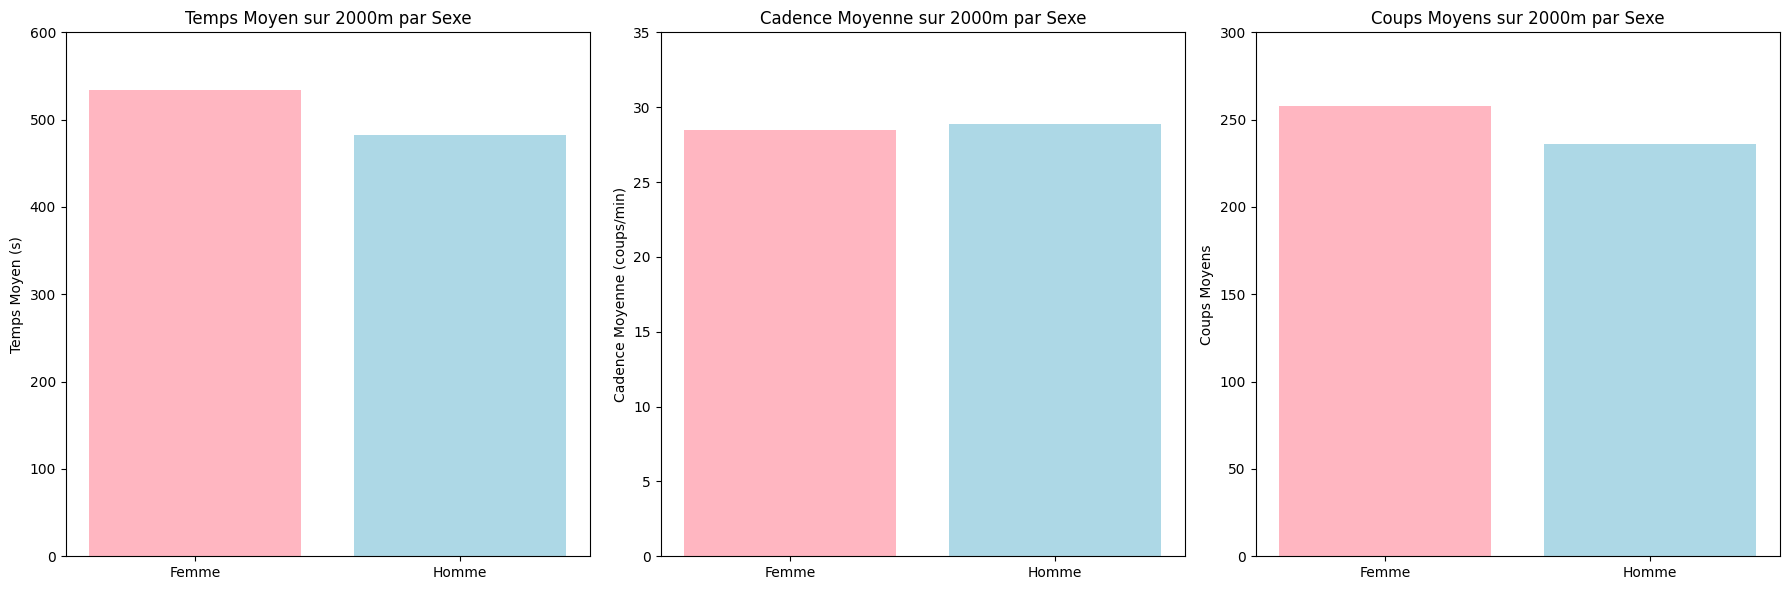

In [147]:
# Données pour les graphiques
sexes = ['Femme', 'Homme']
temps_moyen = [534.12, 482.01]  # En secondes
cadence_moyenne = [28.5, 28.88]  # Coups par minute
coups_moyens = [257.67, 236.31]  # Nombre total de coups
couleurs = ['#FFB6C1', '#ADD8E6']  # Rose pâle et bleu pâle

# Créer une figure avec 3 sous-graphiques côte à côte
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Graphique du Temps Moyen sur 2000m
axs[0].bar(sexes, temps_moyen, color=couleurs)
axs[0].set_title("Temps Moyen sur 2000m par Sexe")
axs[0].set_ylabel("Temps Moyen (s)")
axs[0].set_ylim(0, 600)

# Graphique de la Cadence Moyenne sur 2000m
axs[1].bar(sexes, cadence_moyenne, color=couleurs)
axs[1].set_title("Cadence Moyenne sur 2000m par Sexe")
axs[1].set_ylabel("Cadence Moyenne (coups/min)")
axs[1].set_ylim(0, 35)

# Graphique des Coups Moyens sur 2000m
axs[2].bar(sexes, coups_moyens, color=couleurs)
axs[2].set_title("Coups Moyens sur 2000m par Sexe")
axs[2].set_ylabel("Coups Moyens")
axs[2].set_ylim(0, 300)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


#### Analyse 1 des Graphiques

1. **Temps Moyen sur 2000m par Sexe** :
   - Les hommes ont un temps moyen inférieur, indiquant une meilleure performance globale par rapport aux femmes.

2. **Cadence Moyenne sur 2000m par Sexe** :
   - La cadence moyenne est légèrement plus élevée chez les hommes, ce qui signifie des coups de rame plus fréquents par minute.

3. **Coups Moyens sur 2000m par Sexe** :
   - Les femmes effectuent plus de coups en moyenne, suggérant une différence d’efficacité par rapport aux hommes, qui ont une plus grande longueur par coup de rame.


### IV - Analyse graphique sur les données de performance

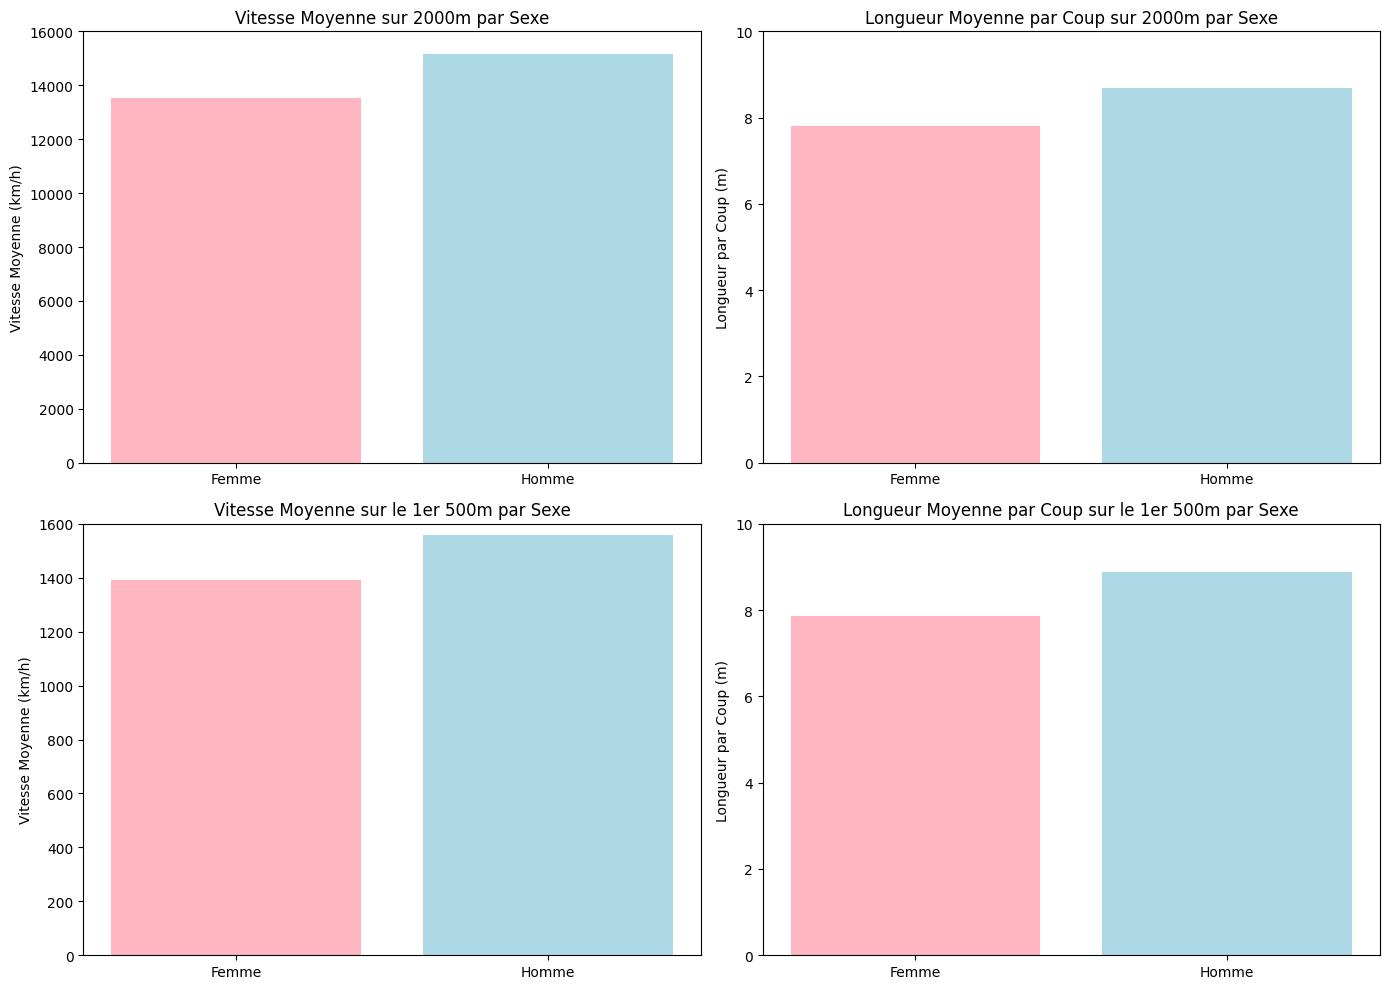

In [148]:
# Données pour les graphiques de la deuxième partie
vitesse_moyenne_2000m = [13533.67, 15144.56]  # Vitesse moyenne en km/h
longueur_par_coup_2000m = [7.80, 8.69]        # Longueur par coup en mètres
vitesse_moyenne_500m_1 = [1390.92, 1559.35]   # Vitesse moyenne pour le premier 500m
longueur_par_coup_500m_1 = [7.87, 8.88]       # Longueur par coup pour le premier 500m
couleurs = ['#FFB6C1', '#ADD8E6']  # Rose pâle et bleu pâle

# Créer une figure avec 2 sous-graphiques par rangée (2x2)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Graphique de la Vitesse Moyenne sur 2000m
axs[0, 0].bar(sexes, vitesse_moyenne_2000m, color=couleurs)
axs[0, 0].set_title("Vitesse Moyenne sur 2000m par Sexe")
axs[0, 0].set_ylabel("Vitesse Moyenne (km/h)")
axs[0, 0].set_ylim(0, 16000)

# Graphique de la Longueur par Coup sur 2000m
axs[0, 1].bar(sexes, longueur_par_coup_2000m, color=couleurs)
axs[0, 1].set_title("Longueur Moyenne par Coup sur 2000m par Sexe")
axs[0, 1].set_ylabel("Longueur par Coup (m)")
axs[0, 1].set_ylim(0, 10)

# Graphique de la Vitesse Moyenne sur le 1er 500m
axs[1, 0].bar(sexes, vitesse_moyenne_500m_1, color=couleurs)
axs[1, 0].set_title("Vitesse Moyenne sur le 1er 500m par Sexe")
axs[1, 0].set_ylabel("Vitesse Moyenne (km/h)")
axs[1, 0].set_ylim(0, 1600)

# Graphique de la Longueur par Coup sur le 1er 500m
axs[1, 1].bar(sexes, longueur_par_coup_500m_1, color=couleurs)
axs[1, 1].set_title("Longueur Moyenne par Coup sur le 1er 500m par Sexe")
axs[1, 1].set_ylabel("Longueur par Coup (m)")
axs[1, 1].set_ylim(0, 10)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


#### Analyse 2 des Graphiques

1. **Vitesse Moyenne sur 2000m par Sexe** :
   - Les hommes ont une vitesse moyenne plus élevée, indiquant une meilleure performance globale.

2. **Longueur Moyenne par Coup sur 2000m par Sexe** :
   - La longueur par coup est supérieure chez les hommes, ce qui montre une plus grande efficacité dans chaque rame.

3. **Vitesse Moyenne sur le 1er 500m par Sexe** :
   - Les hommes maintiennent une vitesse plus élevée dès le début, suggérant un rythme de course initial plus fort.

4. **Longueur Moyenne par Coup sur le 1er 500m par Sexe** :
   - Les hommes ont également une longueur de coup plus grande au départ, ce qui implique une meilleure amplitude et puissance.


### V - Conclusion Globale

L’analyse des performances des hommes et des femmes sur l’ergomètre montre que :
- **Hommes** : Ils ont des vitesses et des longueurs de rame moyennes plus élevées, mais présentent une plus grande variabilité dans leurs performances. Cette dispersion implique des stratégies ou niveaux d'effort différents au sein du groupe.
- **Femmes** : Elles affichent des performances plus homogènes avec une cadence et une amplitude de rame plus constantes, bien que leurs moyennes soient globalement inférieures à celles des hommes.

En somme, les hommes semblent privilégier la puissance et l’amplitude, avec des variations notables, tandis que les femmes maintiennent des efforts plus réguliers et constants tout au long de la course.

# Analyse Supplémentaire 
##  1. Analyse des performances par segmentation (500 mètres)
##  2. Comparaison des performances individuelles avec la moyenne du groupe
##  3. Analyse de la régularité des rameurs (écart-type des performances)




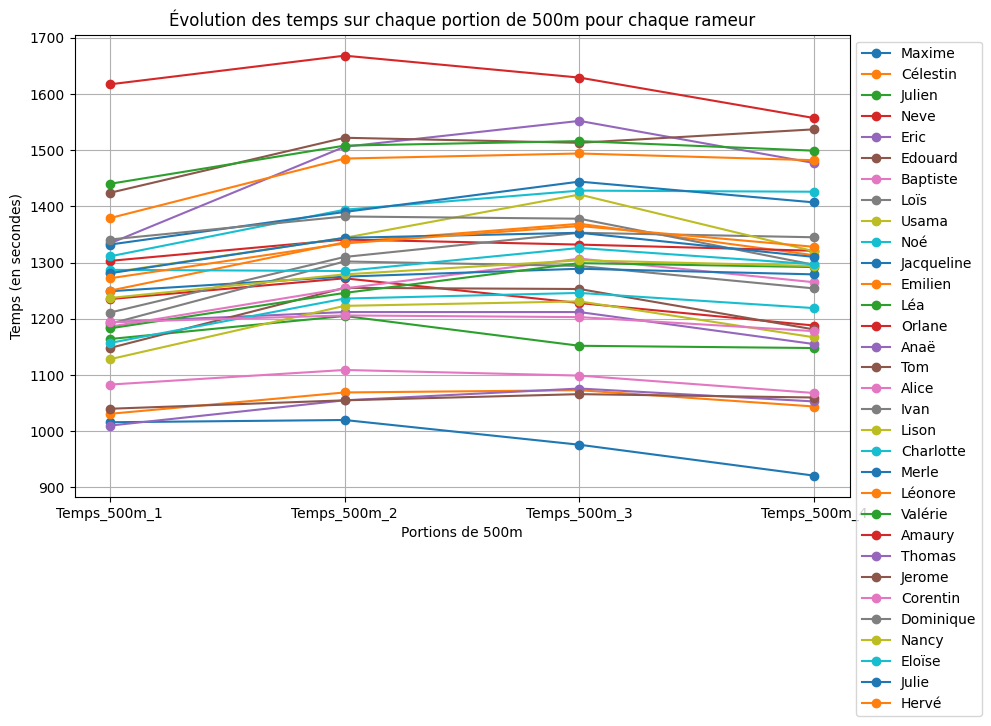

In [149]:
# 1. Analyse des performances par segmentation (500 mètres)

# Extraire les temps pour chaque portion de 500m
portions = [f"Temps_500m_{i}" for i in range(1, 5)]  # Si tu as 4 portions de 500m

# Tracer l'évolution des temps sur les portions de 500m pour chaque rameur
plt.figure(figsize=(10,6))
for index, row in donnees_participants.iterrows():
    plt.plot(portions, row[portions], marker='o', label=row['Participant'])

plt.xlabel('Portions de 500m')
plt.ylabel('Temps (en secondes)')
plt.title("Évolution des temps sur chaque portion de 500m pour chaque rameur")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Pour placer la légende en dehors
plt.grid(True)
plt.show()


On constate la régularité des rameurs sur chaque segment de 500 mètres, les lignes relativement plates nous indiquent que le rameur a maintenu un rythme constant
sur chaque portion, celles en dent de scie nous suggèrent une irrégularité, qui peut se traduire par une stratégie de course diffèrente. Les lignes en haut représentent des temps plus élevés reprèsentant les rameurs qui ont pris plus de temps pour compléter les 500 mètres. À l'inverse, les lignes en bas montrent les rameurs les plus rapides. On constate qu'une stratégie éfficace pourrait etre d'accèlerer sur le dernier segment de 500 mètres, comment on peut le voir au niveau de l'appruche de Maxime.

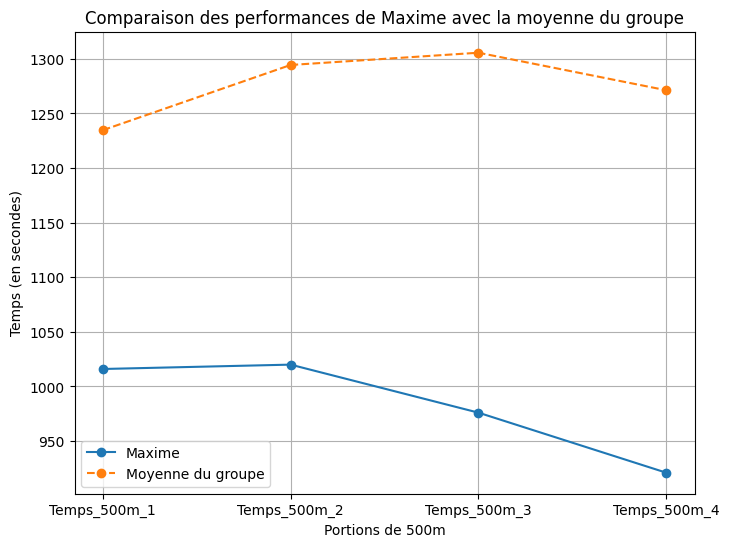

In [150]:
#  2. Comparaison des performances individuelles avec la moyenne du groupe

# Calculer les moyennes du groupe sur les portions de 500m
moyennes = donnees_participants[portions].mean()

# Choisir un rameur spécifique pour la comparaison
rameur = donnees_participants.iloc[0]  # Prendre le premier rameur par exemple

# Comparer ses performances avec la moyenne du groupe
plt.figure(figsize=(8,6))
plt.plot(portions, rameur[portions], label=f"{rameur['Participant']}", marker='o')
plt.plot(portions, moyennes, label="Moyenne du groupe", marker='o', linestyle='--')

plt.xlabel('Portions de 500m')
plt.ylabel('Temps (en secondes)')
plt.title(f"Comparaison des performances de {rameur['Participant']} avec la moyenne du groupe")
plt.legend()
plt.grid(True)
plt.show()


La courbe de Maxime est globalement en dessous de la moyenne du groupe, indiquant qu’il est plus rapide que la moyenne sur chaque portion de 500 mètres. On remarque qu'il accélère progressivement tout en maintenant une régularité dans l'effort, avec une amélioration sur les portions ultérieures, contrairement à la moyenne du groupe. La moyenne du groupe est à l'inverse légèrement ascendante, ce qui signifie que, globalement, les autres rameurs tendent à ralentir sur les portions ultérieures.

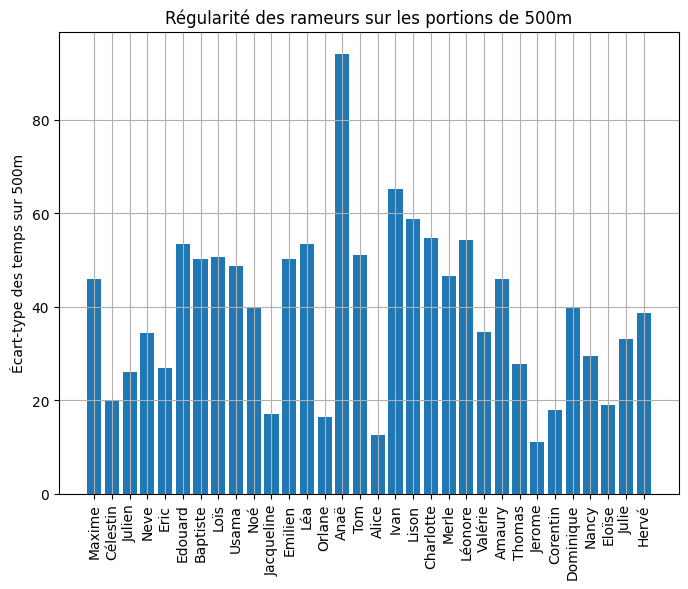

In [151]:
# 3 . Calculer l'écart-type des temps pour chaque rameur sur les portions de 500m
donnees_participants['Ecart_type_500m'] = donnees_participants[portions].std(axis=1)

# Visualiser les écarts-types (régularité)
plt.figure(figsize=(8,6))
plt.bar(donnees_participants['Participant'], donnees_participants['Ecart_type_500m'])
plt.xticks(rotation=90)  # Rotation des noms des rameurs
plt.ylabel("Écart-type des temps sur 500m")
plt.title("Régularité des rameurs sur les portions de 500m")
plt.grid(True)
plt.show()


Nous analysons ensuite l'écart-type des temps pour chaque rameur sur les portions de 500 mètres, naturellement, un écart-type élevé impliquerait de fortes variations des temps, signifiant un manque de stratégies ou une baisse de l'endurance du rameur concerné, symmétriquement, un écart-type plus modéré nous indique une réguarité dans les éfforts, signe d'une préparation accrue du rameur. Anae pourrait par exemple travailler sur des exercices fractionnés dans le but de mieux controler son temps sur chaque portion 